## All the Presidents' Ages

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.assignment import load_assignment 
tests = load_assignment('president_ages.ok')

WARNING  | guidance.py:102 | Failed to read .ok_guidance file. It may not exist


Assignment: All the Presidents' Ages
OK, version v1.12.10



As of this writing, the US has had 43 Presidents, and 38 are deceased.  Let's figure out how long they lived.

First, a note.  These exercises are designed to give you practice *computing with arrays*.  Since there are only 38 Presidents, you could avoid using arrays by copying each computation 38 times.  You wouldn't learn much, so don't do that.

Our data from [PresidentsUSA.net](http://www.presidentsusa.net/birth.html) tell us the birth and death date of each President.  The cell below loads these data, along with the Presidents' names.  (We've used a table for presentation purposes; you don't need to know about tables to do this exercise.)

Note that the Presidents are presented in order by *birth date*, so for example John F. Kennedy (President from 1961-1963) comes after Richard M. Nixon (President from 1969-1974) because he was born earlier.

In [2]:
# Just run this cell.

presidents = Table.read_table("presidents.csv").select("Name", "Birth Year", "Death Year")
# This is an array of the birth years of the dead presidents.  It's the data
# you see displayed in the "Birth Year" column below.
birth_years = presidents.column("Birth Year")
# This is an array of the death years of the dead presidents.  It's the data
# you see displayed in the "Death Year" column below.  The first element of
# this array describes the same president as the first element of birth_years,
# and so on.
death_years = presidents.column("Death Year")
presidents.show()

Name,Birth Year,Death Year
George Washington,1732,1799
John Adams,1735,1826
Thomas Jefferson,1743,1826
James Madison,1751,1836
James Monroe,1758,1831
Andrew Jackson,1767,1845
John Quincy Adams,1767,1848
William Henry Harrison,1773,1841
Martin Van Buren,1782,1862
Zachary Taylor,1784,1850


**Question 1.** Compute the number of years between each President's birth and death (their longevity).  Put your answers in an array called `longevity`.  The first item of `longevity` should be the longevity of the first president in `dead_presidents_years`, and so on.  Use the arrays `death_years` and `birth_years`, which are loaded in the cell above.

In [3]:
longevity = abs(death_years - birth_years)

# This piece of code puts your results into a table for better
# display.  You can ignore it.
presidents.with_column("Longevity", longevity).show()

Name,Birth Year,Death Year,Longevity
George Washington,1732,1799,67
John Adams,1735,1826,91
Thomas Jefferson,1743,1826,83
James Madison,1751,1836,85
James Monroe,1758,1831,73
Andrew Jackson,1767,1845,78
John Quincy Adams,1767,1848,81
William Henry Harrison,1773,1841,68
Martin Van Buren,1782,1862,80
Zachary Taylor,1784,1850,66


In [4]:
_ = tests.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Below, we've plotted the longevity of each president, which you just computed.

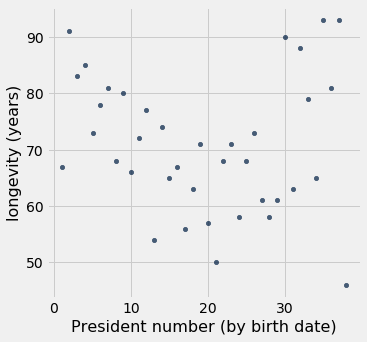

In [5]:
# Just run this cell.
Table().with_columns(
        "President number (by birth date)", np.arange(1, presidents.num_rows+1),
        "longevity (years)", longevity)\
    .scatter(0)

**Question 2.** Suppose each President were [still alive](http://futurama.wikia.com/wiki/Richard_M._Nixon's_head) in 2016.  How old would each one be?

In [6]:
ages_today = abs(2016 - birth_years)

# This piece of code puts your results into a table for better
# display.  You can ignore it.
presidents.with_column("Age Today", ages_today).show()

Name,Birth Year,Death Year,Age Today
George Washington,1732,1799,284
John Adams,1735,1826,281
Thomas Jefferson,1743,1826,273
James Madison,1751,1836,265
James Monroe,1758,1831,258
Andrew Jackson,1767,1845,249
John Quincy Adams,1767,1848,249
William Henry Harrison,1773,1841,243
Martin Van Buren,1782,1862,234
Zachary Taylor,1784,1850,232


In [7]:
_ = tests.grade('q2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** A colleague points out that John Adams died at age 90, but your answer to Question 1 probably says that he lived 91 years!  John Adams was born October 30, 1735, and died July 4, 1826.  Explain the discrepancy.

*Write your answer here, replacing this text.*

Let's fix this.  Below, we've loaded a more precise dataset.  Instead of just birth year and death year, we also have the number of *days* that passed since January 1 of those years.  If someone was born on the 200th day of the year and died on the 100th day of the year, then their birthday hadn't already passed, so we should decrease their longevity by 1.

In [8]:
# Just run this cell.
detailed_ages = Table.read_table("presidents.csv").select("Name", "Birth Year", "Days since January 1 at Birth", "Death Year", "Days since January 1 at Death")
birth_days = detailed_ages.column("Days since January 1 at Birth")
death_days = detailed_ages.column("Days since January 1 at Death")
detailed_ages

Name,Birth Year,Days since January 1 at Birth,Death Year,Days since January 1 at Death
George Washington,1732,53,1799,348
John Adams,1735,303,1826,185
Thomas Jefferson,1743,103,1826,185
James Madison,1751,75,1836,180
James Monroe,1758,118,1831,185
Andrew Jackson,1767,74,1845,159
John Quincy Adams,1767,192,1848,54
William Henry Harrison,1773,40,1841,94
Martin Van Buren,1782,339,1862,205
Zachary Taylor,1784,329,1850,190


**Question 4.** For each President, compute how many more days passed before their death in their year of death than before their birth in their year of birth.  For example, that number for George Washington is 295, and for John Adams it's -118.  We'll call this number the "net additional life days."

In [9]:
net_additional_life_days = death_days - birth_days

# This piece of code puts your results into a table for better
# display.  You can ignore it.
detailed_ages.with_column("Net Additional Life Days", net_additional_life_days)

Name,Birth Year,Days since January 1 at Birth,Death Year,Days since January 1 at Death,Net Additional Life Days
George Washington,1732,53,1799,348,295
John Adams,1735,303,1826,185,-118
Thomas Jefferson,1743,103,1826,185,82
James Madison,1751,75,1836,180,105
James Monroe,1758,118,1831,185,67
Andrew Jackson,1767,74,1845,159,85
John Quincy Adams,1767,192,1848,54,-138
William Henry Harrison,1773,40,1841,94,54
Martin Van Buren,1782,339,1862,205,-134
Zachary Taylor,1784,329,1850,190,-139


In [10]:
_ = tests.grade('q4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



To get each President's actual age at death, we should subtract 1 from the longevity of Presidents whose net additional life days are negative.  One way to do this is:

* Divide each net additional life day amount by 366 to get a fraction of a year.
* Round each fraction down to the nearest integer, using the function `np.floor`.  (`np.floor` takes as its argument an array of numbers.  It returns an array of those numbers rounded down to the nearest integer.)
* Add the result to each President's longevity.

**Question 5.** Compute each President's actual longevity by following the steps above.

*Hint 1:* Use the arrays you've already calculated in previous questions.

*Hint 2:* Our answer uses a single line with a compound expression, but you may find it simpler to perform each of the three steps on its own line, giving a name to each intermediate result so you can use it on the next line.

In [11]:
true_longevity = np.floor(net_additional_life_days / 365) + longevity

# This piece of code puts your results into a table for better
# display.  You can ignore it.
detailed_ages.with_column("True Longevity", true_longevity).show()

Name,Birth Year,Days since January 1 at Birth,Death Year,Days since January 1 at Death,True Longevity
George Washington,1732,53,1799,348,67
John Adams,1735,303,1826,185,90
Thomas Jefferson,1743,103,1826,185,83
James Madison,1751,75,1836,180,85
James Monroe,1758,118,1831,185,73
Andrew Jackson,1767,74,1845,159,78
John Quincy Adams,1767,192,1848,54,80
William Henry Harrison,1773,40,1841,94,68
Martin Van Buren,1782,339,1862,205,79
Zachary Taylor,1784,329,1850,190,65


In [12]:
_ = tests.grade('q5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [13]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [14]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".president_ages_$(date +%m%d_%H%M)_submission.html" president_ages.ipynb